In [8]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


The ideas that we looked at for algebraic equations with dominant balancing can also be applied to differential equations. We'll jump straight in with a BVP example

## Example
\begin{align}
    \varepsilon y'' + (1 + \varepsilon) y' + y &= 0, & 0 < x &< 1, & 0 < \varepsilon &\ll 1, \\
    && y(0) &= 1 & y(1)= 1
\end{align}
As usual, we'll begin by attempting to find an RP solution. We assume
\begin{equation}
    y(x) = y_0(x) + \varepsilon y_1(x) + \varepsilon^2 y_2(x) + \cdots
\end{equation}
Following the usual process, we arrive at the first two BVPs
\begin{align}
    y_0' + y_0 &= 0, & y_0(0) &= 0, & y_0(1) &= 1 \\
    y_1' + y_1 &= -y_0'' - y_0', & y_1(0) & = 0 & y_1(0) &= 1
\end{align}
We immediately encounter a problem. The first BVP cannot be solved, it has the form 
\begin{equation}
    y_0(t) = ce^{-x}
\end{equation}
which cannot be made to satisfy both boundary conditions. So regular perturbation has failed at the first hurdle.

Again, we've chosen an example for which we can find the general solution easily. Applying standard techniques, we find the solution to be

\begin{equation}
    y(x) = \frac{1}{e^{-1} - e^{-1/\varepsilon}} (e^{-x} - e^{-x / \varepsilon})
\end{equation}

If we plot this on a graph, we can begin to see the problem. In particular, if we plot the three terms of the ODE, we can see their relative magnitudes
    

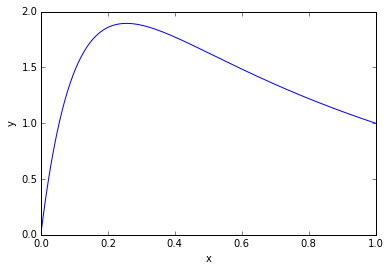

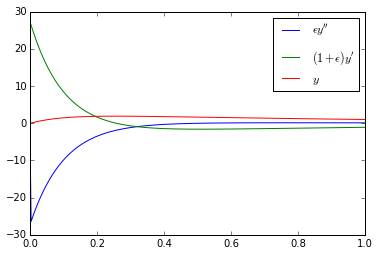

In [28]:
h = 1e-3
x = arange(0, 1, h)
epsilon = 1e-1
y = 1 / (exp(-1) - exp(-1/epsilon)) * (exp(-x) - exp(-x/epsilon))
plot(x, y)
xlabel('x')
ylabel('y')

dy = gradient(y, h)
d2y = gradient(dy, h)

figure()
ax = gca()
ax.plot(x, epsilon*d2y, label="$\epsilon y''$")
ax.plot(x, (1 + epsilon)*dy, label="$(1 + \epsilon)y'$")
ax.plot(x, y, label="$y$")
ax.legend(loc='best')




We can clearly see that at least initially, our assumption that the term $\varepsilon y''$ is negligible is completely wrong. It is true later on, but we need to do something different initially. We can see this analytically as well:
\begin{align}
    y' &= \frac{1}{e^{-1} - e^{-1/\varepsilon}} \left(-e^{-x} + \frac{1}{\varepsilon} e^{-x/\varepsilon}\right) \\
    y'' &= \frac{1}{e^{-1} - e^{-1/\varepsilon}} \left(e^{-x} - \frac{1}{\varepsilon^2} e^{-x/\varepsilon}\right)
\end{align}
If we look near zero, by substituting $x = \varepsilon$, we can see that $y''(\varepsilon) = O(\varepsilon^{-2})$, and so $\varepsilon y''(\varepsilon) = O(\varepsilon^{-1})$.

Further away, e.g. at $x = \frac{1}{2}$, we can see that $y''(\frac{1}{2}) = O(1)$, and so $\varepsilon y''(\frac{1}{2})$ is indeed small, and can be neglected.

So, what we make of this is that the differential equation is *not correctly scaled* for small $x$, and we have to rescale $x$ to understand what is happening in this region.
* The fast-changing region is known as the *boundary layer* and,
* The slow region is known as the *outer layer*

With this knowledge in mind, we can actually approximate our solution in the outer layer by just utilising the right hand boundary condition, we get our *outer approximation* $y_o = e^{1 - x}$. We can also cheat and figure out what the inner approximation must be by examining the general solution:
\begin{equation}
    y_i(x) = e(1 - e^{-x/\varepsilon})
\end{equation}



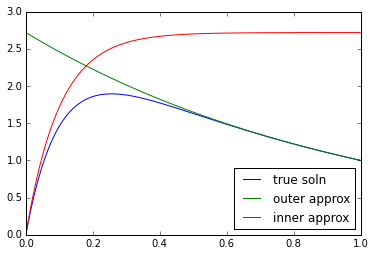

In [31]:
figure()
ax = gca()
ax.plot(x, y, label='true soln')
ax.plot(x, exp(1 - x), label='outer approx')
ax.plot(x, exp(1) - exp(1 - x/epsilon), label='inner approx')
ax.legend(loc='best')